In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

file = '/Users/vav/Work/thesis_2025/ts_llm_prediction/SPY_full.csv'
RS=42

In [21]:
df = pd.read_csv(file)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index('Date')
df.head()

,Close,Volume,Dividends,Stock Splits,in_sp500,Close_SMA_7,Close_SMA_50,Close_SMA_200,Volume_SMA_7,Volume_SMA_50,...,MSFT_Close_SMA_200,JPM_Close,JPM_Volume,JPM_Dividends,JPM_Close_SMA_7,JPM_Close_SMA_50,JPM_Close_SMA_200,delistings,listings,splits
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-06,137.7500,6227200,0.0,0.0,1,143.323661,140.855625,135.102188,6.353457e+06,6163246.0,...,45.205312,47.625000,8369250,0.0,49.422619,52.860208,53.026406,0.0,1.0,0.0
2000-01-07,145.7500,8066500,0.0,0.0,1,143.171875,141.168125,135.183437,7.077100e+06,6215910.0,...,45.258984,48.500000,6571950,0.0,48.964286,52.726875,52.997240,0.0,0.0,0.0
2000-01-10,146.2500,5741700,0.0,0.0,1,143.116071,141.401875,135.271875,7.377157e+06,6120550.0,...,45.316953,47.666668,4723500,0.0,48.339286,52.499375,52.967240,0.0,0.0,0.0
2000-01-11,144.5000,7503700,0.0,0.0,1,142.776786,141.551875,135.338594,7.995871e+06,6050852.0,...,45.359453,46.541668,8405550,0.0,47.589286,52.266875,52.925781,0.0,0.0,0.0
2000-01-12,143.0625,6907700,0.0,0.0,1,142.437500,141.701875,135.401563,7.816357e+06,6108876.0,...,45.391484,46.833332,7271850,0.0,47.339286,52.089375,52.886823,0.0,0.0,0.0


In [22]:
# Missing Values Check
nulls = df.isnull().sum().reset_index()
nulls[nulls[0]>0]

,index,0


# Stationarity

ADF Statistic: 2.0500280425503354
p-value: 0.9987345340023387
Critical Values:
1%, -3.4313867610486315
Critical Values:
5%, -2.8619981572114166
Critical Values:
10%, -2.56701387403588


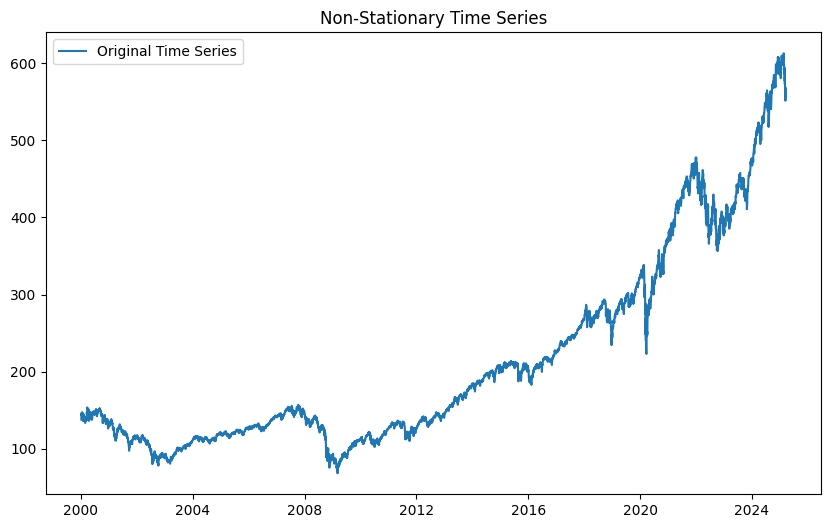

In [23]:
# Shift SPY price by 1, to predict 1d ahead

# Perform ADF test
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'{key}, {value}')
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot( df['Close'], label='Original Time Series')
plt.title('Non-Stationary Time Series')
plt.legend()
plt.show()

ADF Statistic (Differenced): -16.303695250881745
p-value (Differenced): 3.247276549753825e-29
Critical Values (Differenced):
1%, -3.4313867610486315
Critical Values (Differenced):
5%, -2.8619981572114166
Critical Values (Differenced):
10%, -2.56701387403588


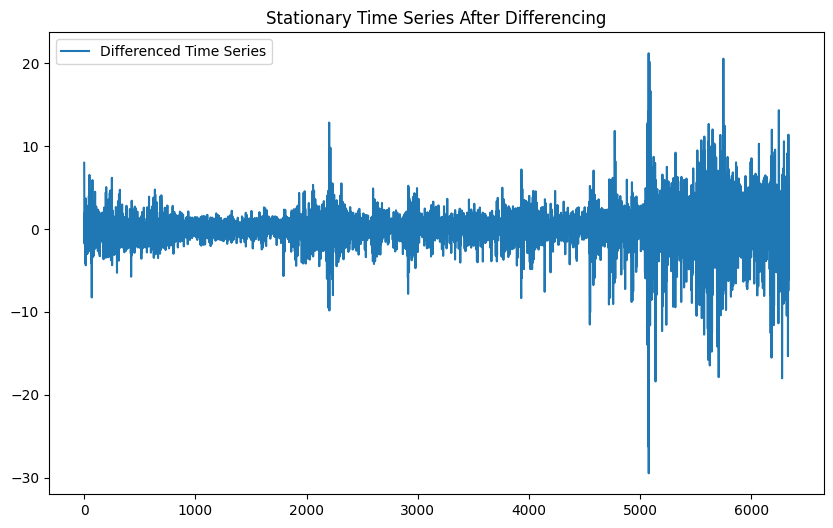

In [24]:
# Differencing to make the series stationary
diff_series = np.diff(df['Close'], n=1)
# Perform ADF test on differenced series
result_diff = adfuller(diff_series)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Values (Differenced):')
    print(f'{key}, {value}')
# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot( diff_series, label='Differenced Time Series')
plt.title('Stationary Time Series After Differencing')
plt.legend()
plt.show()

In [25]:
df['target_diff'] = [np.nan] + diff_series.tolist()
df['target_diff'] = df['target_diff'].shift(-1)
df = df.dropna()
df.head()

,Close,Volume,Dividends,Stock Splits,in_sp500,Close_SMA_7,Close_SMA_50,Close_SMA_200,Volume_SMA_7,Volume_SMA_50,...,JPM_Close,JPM_Volume,JPM_Dividends,JPM_Close_SMA_7,JPM_Close_SMA_50,JPM_Close_SMA_200,delistings,listings,splits,target_diff
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-06,137.7500,6227200,0.0,0.0,1,143.323661,140.855625,135.102188,6.353457e+06,6163246.0,...,47.625000,8369250,0.0,49.422619,52.860208,53.026406,0.0,1.0,0.0,8.0000
2000-01-07,145.7500,8066500,0.0,0.0,1,143.171875,141.168125,135.183437,7.077100e+06,6215910.0,...,48.500000,6571950,0.0,48.964286,52.726875,52.997240,0.0,0.0,0.0,0.5000
2000-01-10,146.2500,5741700,0.0,0.0,1,143.116071,141.401875,135.271875,7.377157e+06,6120550.0,...,47.666668,4723500,0.0,48.339286,52.499375,52.967240,0.0,0.0,0.0,-1.7500
2000-01-11,144.5000,7503700,0.0,0.0,1,142.776786,141.551875,135.338594,7.995871e+06,6050852.0,...,46.541668,8405550,0.0,47.589286,52.266875,52.925781,0.0,0.0,0.0,-1.4375
2000-01-12,143.0625,6907700,0.0,0.0,1,142.437500,141.701875,135.401563,7.816357e+06,6108876.0,...,46.833332,7271850,0.0,47.339286,52.089375,52.886823,0.0,0.0,0.0,1.9375


## Feature Selection

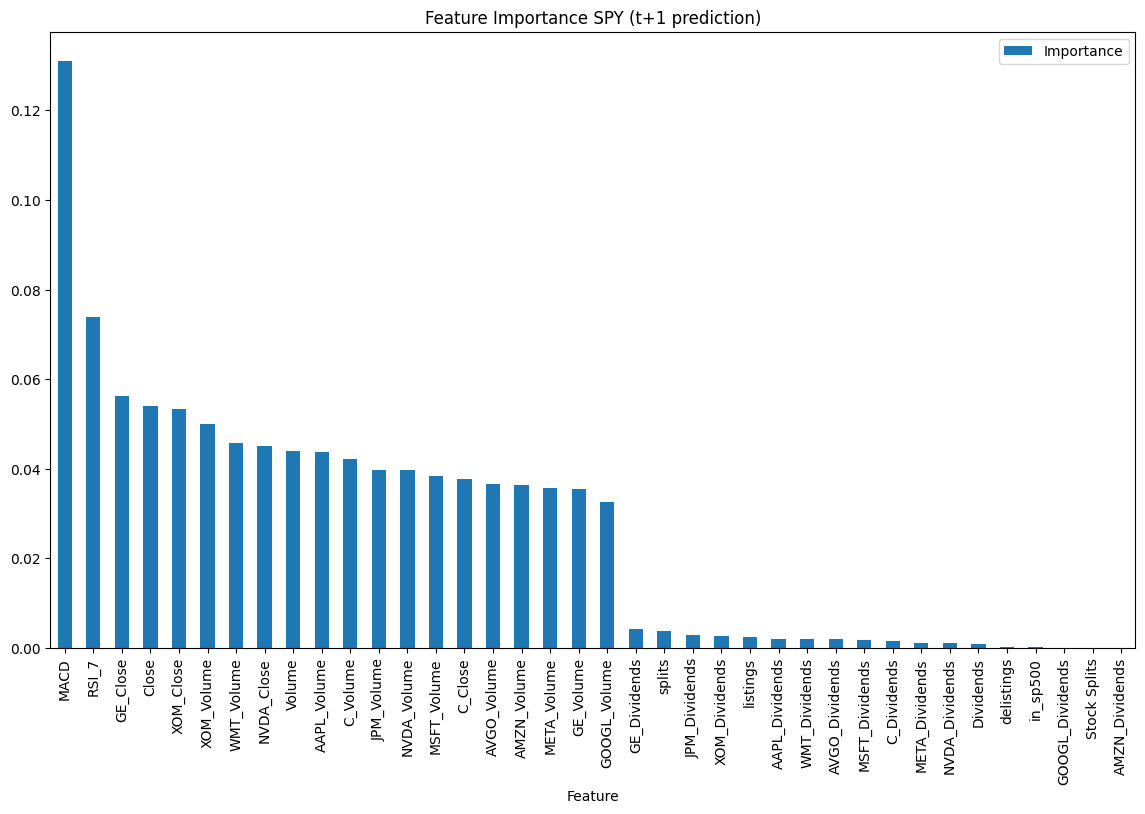

In [26]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns = ['target_diff', 'Histogram'])
y = df['target_diff']
# Remove highly correlated features
corr_matrix = X.corr().abs()
upper =corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

X_reduced = X.drop(columns=to_drop)

# Train a Random Forest model
model = RandomForestRegressor(random_state=RS)
model.fit(X_reduced, y)


# Get feature importance
importances = model.feature_importances_
feature_names = X_reduced.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


importance_df.plot(kind='bar', x='Feature',y='Importance', figsize=(14, 8))
plt.title('Feature Importance SPY (t+1 prediction)')
plt.show()

In [27]:
importance_df

,Feature,Importance
6,MACD,0.131002
5,RSI_7,0.073871
16,GE_Close,0.056243
0,Close,0.054066
26,XOM_Close,0.053337
27,XOM_Volume,0.049937
19,WMT_Volume,0.045745
9,NVDA_Close,0.044985
1,Volume,0.043858
7,AAPL_Volume,0.043755
